In [43]:
import os
import sys
import torch
from torchvision import transforms
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.image as img
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
!pwd

/home/lev/Projects/cv2021/project/CV2021Project


In [2]:
ROOT_PATH= '/home/lev/Projects/cv2021/project/CV2021Project/'
DATASET_ROOT_PATH = ROOT_PATH + 'Assigment4_datasets/'
FAKES_DATASET_PATH = DATASET_ROOT_PATH + 'fakes_dataset/'
SYNTHETICS_DATASET_PATH = DATASET_ROOT_PATH + 'synthetic_dataset/'
CODE_PATH = ROOT_PATH + 'solution'
sys.path.append(CODE_PATH)
%cd {CODE_PATH}

/home/lev/Projects/cv2021/project/CV2021Project/solution


In [3]:
from faces_dataset import FacesDataset, LABELS
from plot_samples_of_faces_datasets import plot_samples

In [4]:
import random
from utils import load_dataset

## Plot sample faces

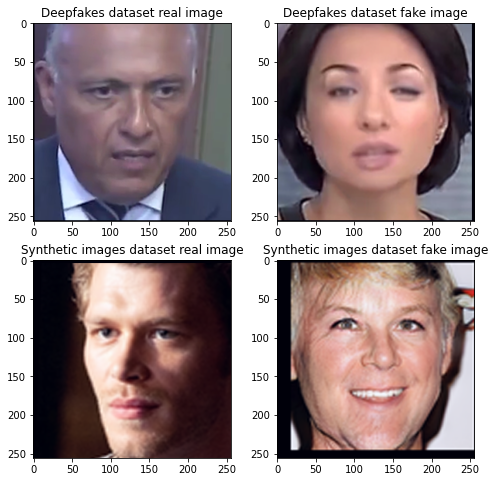

In [5]:
plot_samples()

## 3.2 Train deepfake on simplenet

In [35]:
!{"python3 train_main.py -d fakes_dataset -m SimpleNet --lr 0.001 -b 32 -e 5 -o Adam"}

==> Preparing data: fakes dataset..
Building model SimpleNet...
Building optimizer Adam...
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)
Epoch 1/5
total batches:10
total images:10800
printing every:67
device:cuda
predictions:tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       device='cuda:0') len:32
Epoch [001] | Loss: 0.717 | Acc: 28.12[%] Correct:(9/32)
predictions:tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0') len:32
Epoch [001] | Loss: 0.642 | Acc: 65.49[%] Correct:(1425/2176)
predictions:tensor([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0') len:32
Epoch [001] | Loss: 0.618 | Acc: 66.92

predictions:tensor([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
        0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.],
       device='cuda:0') len:32
Epoch [004] | Loss: 0.182 | Acc: 92.41[%] Correct:(3992/4320)
predictions:tensor([0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       device='cuda:0') len:32
Epoch [004] | Loss: 0.176 | Acc: 92.56[%] Correct:(5983/6464)
predictions:tensor([1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.],
       device='cuda:0') len:32
Epoch [004] | Loss: 0.173 | Acc: 92.87[%] Correct:(7994/8608)
predictions:tensor([0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       device='cuda:0') len:32
Epoch [004] | Loss: 0.170 | Acc: 93.02[%] Correct:(10001/10752

## 3.3 Analyze the Deepfake Detection Classifier

In [38]:
!{"python plot_accuracy_and_loss.py -m SimpleNet -j out/fakes_dataset_SimpleNet_Adam.json -d fakes_dataset"}

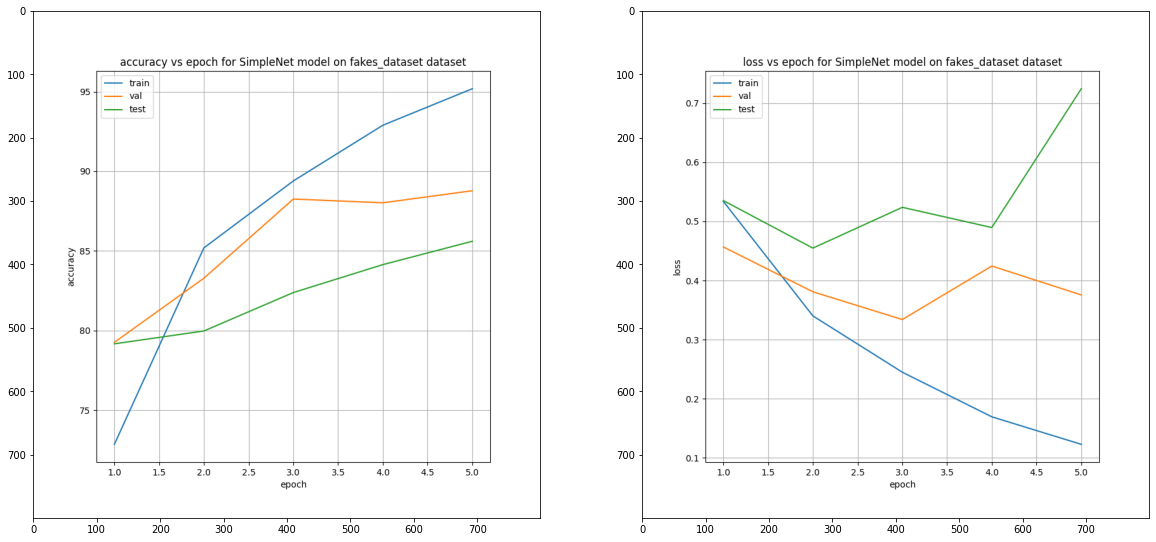

In [57]:
fig, ax = plt.subplots(1,2, figsize=(20,20))
acc_img = img.imread('./figures/fakes_dataset_SimpleNet_accuracies_plot.png')
loss_img = img.imread('./figures/fakes_dataset_SimpleNet_losses_plot.png')
ax[0].imshow(acc_img)
ax[1].imshow(loss_img)